In [19]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic, binned_statistic_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.pf_stats import *
from src.regions import *
from src.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
regions = [cio_region(), wmp_region()]
df = pd.concat(
    [load_pf_stats(r) for r in regions], 
)


In [21]:
times = pd.DatetimeIndex([pd.to_datetime(t,format='%Y%m%d_%H:%M:%S') for t in  df['observation_time']])

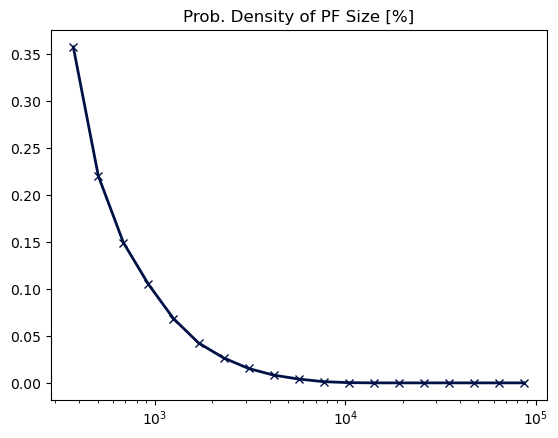

In [23]:
df_old = df[times<=pd.to_datetime('2016-01-01')]

#
# PF sizes and MaxPr histogram and dependence
#

fig, ax = plt.subplots()
area = df_old.num_pixels * 25
area_bins = np.logspace(2.5, 5, 20)

counts = binned_statistic(
    area,
    None,
    bins=area_bins, 
    statistic='count'
).statistic

ax.plot(
    array_midpoints(area_bins),
    counts/counts.sum(),
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
ax.set_title('Prob. Density of PF Size [%]')
ax.set_xscale('log')


AttributeError: The number of `values` elements must match the length of each `sample` dimension.

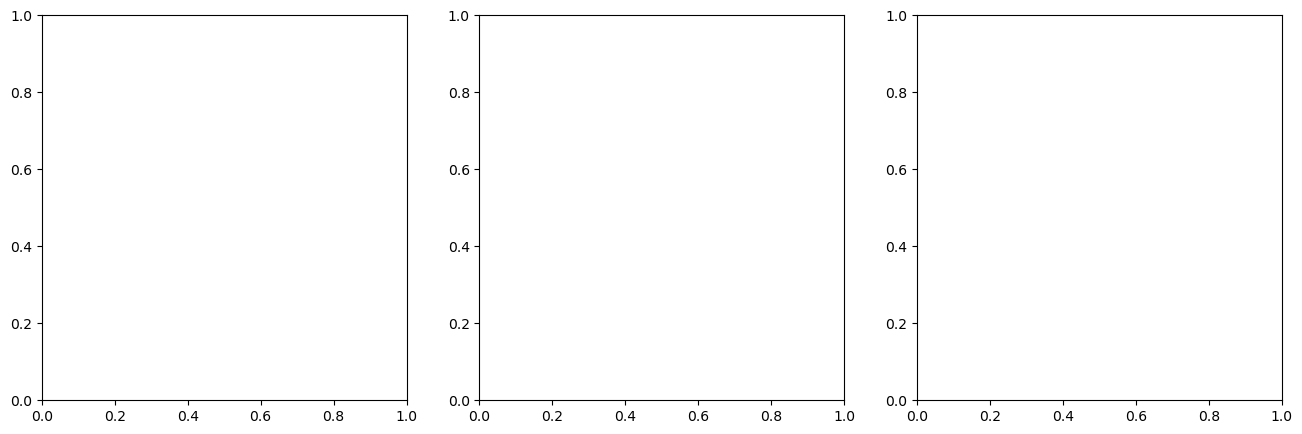

In [13]:
#
# PF sizes and MaxPr histogram and dependence
#

fig, axs = plt.subplots(ncols=3, figsize=(16,5))

area = df_old.num_pixels * 25
area_bins = np.logspace(2.5, 5, 20)

counts = binned_statistic(
    area,
    None,
    bins=area_bins, 
    statistic='count'
).statistic

maxpr = binned_statistic(
    area,
    df.max_precip,
    bins=area_bins, 
    statistic=lambda x: np.nanmean(x) if x.size>50 else np.nan
).statistic

meanpr = binned_statistic(
    area,
    df.total_precip/df.num_pixels,
    bins=area_bins, 
    statistic=lambda x: np.nanmean(x) if x.size>50 else np.nan
).statistic

axs[0].plot(
    array_midpoints(area_bins),
    100*counts/counts.sum(),
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[0].set_title('Prob. Density of PF Size [%]')
axs[0].set_yscale('log')

axs[1].plot(
    array_midpoints(area_bins),
    maxpr,
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[1].set_title('MaxPr [mm/hr]')

axs[2].plot(
    array_midpoints(area_bins),
    meanpr,
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[2].set_title('MeanPr [mm/hr]')

for ax in axs.ravel():
    ax.set_xlabel('PF Area [km2]')
    ax.set_xscale('log')
    ax.set_xlim(area_bins.min(), area_bins.max())
    ax.grid()

fig.tight_layout(pad=1.0)

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_99115/3225245320.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('loc_bin')


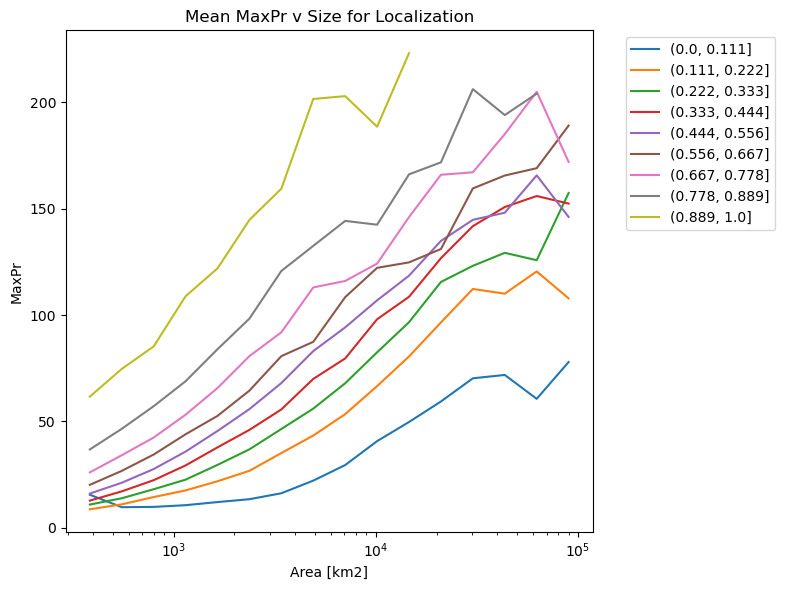

In [36]:
regions = [cio_region(), wmp_region()]
df = pd.concat(
    [load_pf_stats(r) for r in regions], 
)
df['loc'] = df['max_5mmhr_cluster_precip']/df['total_precip']
df['loc_bin'] = pd.cut(df['loc'], bins=np.linspace(0, 1, 10))
precip_bins = np.linspace(5, 150, 30)
area_bins = np.logspace(2.5, 5.5, 20)
grouped = df.groupby('loc_bin')
plt.figure(figsize=(8, 6))
for bin_label, group in grouped:
    stats = binned_statistic(
        group['num_pixels']*25, 
        group['max_precip'],
        bins=area_bins,
        statistic=lambda x: np.nanmean(x) if x.size>10 else np.nan
    ).statistic
    
    plt.plot(
        array_midpoints(area_bins), 
        stats,
        label=bin_label
    )
plt.xlabel("Area [km2]")
plt.ylabel("MaxPr")
plt.title("Mean MaxPr v Size for Localization")
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_99115/3522168616.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('loc_bin')


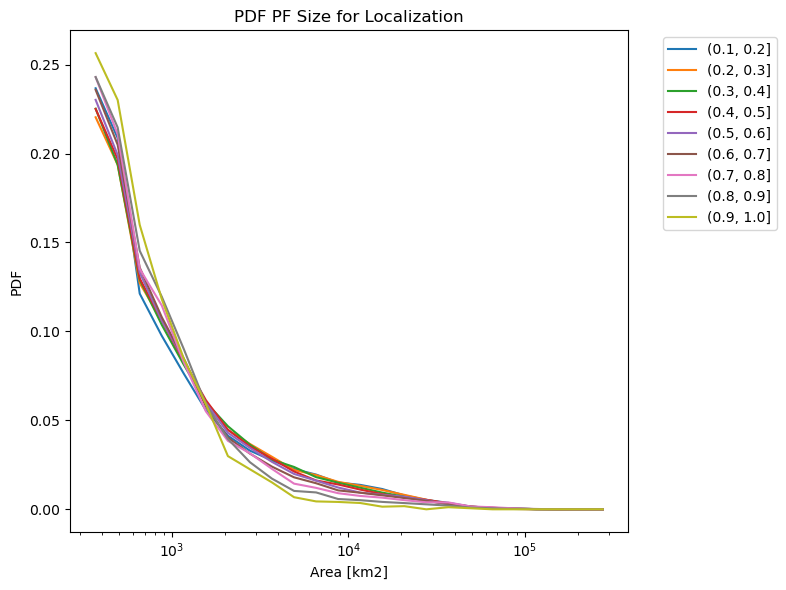

In [42]:
regions = [cio_region(), wmp_region()]
df = pd.concat(
    [load_pf_stats(r) for r in regions], 
)
df['loc'] = df['max_5mmhr_cluster_precip']/df['total_precip']
df['loc_bin'] = pd.cut(df['loc'], bins=np.linspace(0.1, 1, 10))
precip_bins = np.linspace(5, 150, 30)
area_bins = np.logspace(2.5, 5.5, 25)
grouped = df.groupby('loc_bin')
plt.figure(figsize=(8, 6))
for bin_label, group in grouped:
    stats = binned_statistic(
        group['num_pixels']*25, 
        None,
        bins=area_bins,
        statistic='count'
    ).statistic
    
    plt.plot(
        array_midpoints(area_bins), 
        stats/stats.sum(),
        label=bin_label
    )
plt.xlabel("Area [km2]")
plt.ylabel("PDF")
plt.title("PDF PF Size for Localization")
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


(25.0, 25000.0)

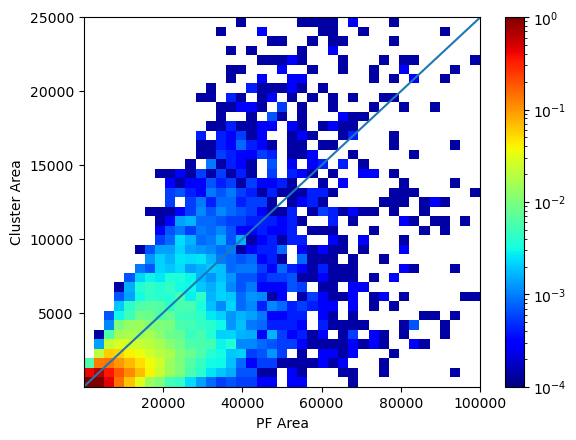

In [4]:
pf_area = df['num_pixels'] * 25
cluster_area = df['max_5mmhr_size'] * 25
pf_area_bins = np.linspace(100, 1e5, 40)
cluster_area_bins = np.linspace(25, 1000*25, 40)


fig, ax = plt.subplots()
counts = binned_statistic_2d(
    cluster_area, 
    pf_area, 
    None,
    bins=[cluster_area_bins, pf_area_bins],
    statistic='count'
).statistic

X, Y = np.meshgrid(
    pf_area_bins, 
    cluster_area_bins
)

c = ax.pcolormesh(
    X, 
    Y,
    100*counts/counts.sum(),
    cmap=plt.cm.jet.copy(),
    norm=colors.LogNorm(vmin=1e-4, vmax=1e0)
)

fig.colorbar(c)
ax.plot(pf_area_bins, 0.25*pf_area_bins)
ax.set_xlabel('PF Area')
ax.set_ylabel('Cluster Area')
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlim(pf_area_bins.min(), pf_area_bins.max())
ax.set_ylim(cluster_area_bins.min(), cluster_area_bins.max())

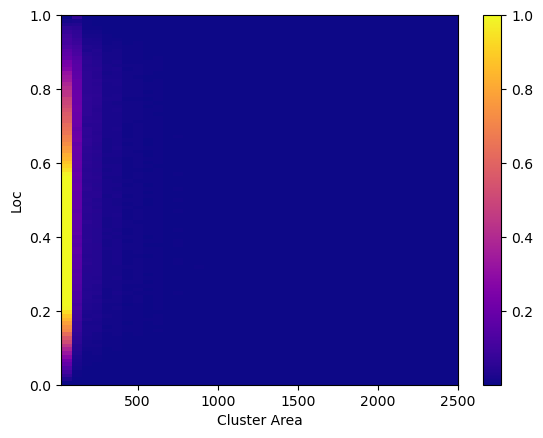

In [32]:
cluster_area = df['max_5mmhr_size'] * 25
loc = df['max_5mmhr_cluster_precip']/df['total_precip']
cluster_area_bins = np.linspace(25, 100*25, 40)
loc_bins = np.linspace(0, 1, 100)


fig, ax = plt.subplots()
counts = binned_statistic_2d(
    loc, 
    cluster_area, 
    None,
    bins=[loc_bins, cluster_area_bins],
    statistic='count'
).statistic

X, Y = np.meshgrid(
    cluster_area_bins, 
    loc_bins
)

c = ax.pcolormesh(
    X, 
    Y,
    100*counts/counts.sum(),
    cmap=plt.cm.plasma.copy(),
    norm=colors.Normalize(vmin=0.001, vmax=1)
)

fig.colorbar(c)
ax.set_xlabel('Cluster Area')
ax.set_ylabel('Loc')
ax.set_xscale('linear')
ax.set_yscale('linear')

Text(0.5, 1.0, 'Prob Dist [%]')

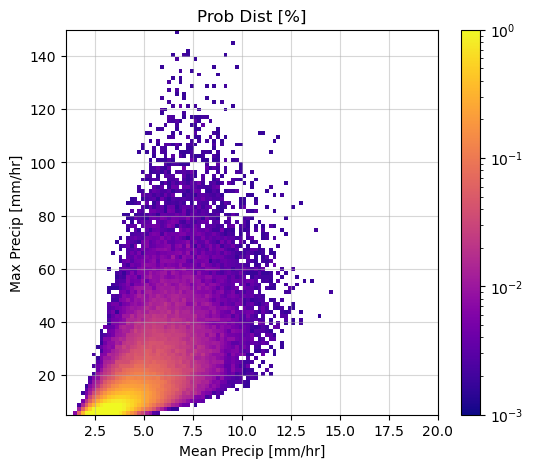

In [61]:
#
# Mean Precip and MaxPr
#

fig, ax = plt.subplots(figsize=(6,5))

meanpr = df['total_precip']/df['num_pixels']
maxpr = df['max_precip']

meanpr_bins = np.linspace(1, 20, 100)
maxpr_bins = np.linspace(5, 150, 100)
counts = binned_statistic_2d(
    maxpr,
    meanpr,
    meanpr,
    bins=[maxpr_bins, meanpr_bins],
    statistic=lambda x: x.size if x.size >=5 else np.nan
).statistic

X, Y = np.meshgrid(
    meanpr_bins, 
    maxpr_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    100*counts/np.nansum(counts), 
    cmap=plt.cm.plasma.copy(), 
    norm=colors.LogNorm(vmin=1e-3, vmax=1e0)
)

cb = fig.colorbar(c)

ax.set_xlabel('Mean Precip [mm/hr]')
ax.set_ylabel('Max Precip [mm/hr]')
ax.grid(alpha=0.5)
ax.set_title('Prob Dist [%]')

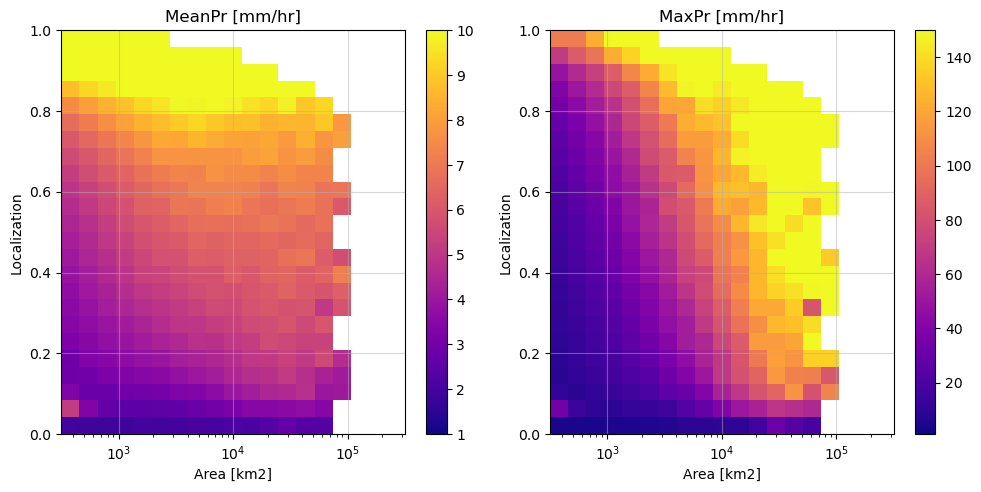

In [93]:
#
# Mean Precip and MaxPr
#

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

meanpr = df['total_precip']/df['num_pixels']
maxpr = df['max_precip']
loc = df['max_5mmhr_cluster_precip']/df['total_precip']
area = df['num_pixels'] * 25

area_bins = np.logspace(2.5, 5.5, 20)
loc_bins = np.linspace(0, 1, 25)

ax = axs[0]
stat = binned_statistic_2d(
    loc,
    area,
    meanpr,
    bins=[loc_bins, area_bins],
    statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan
).statistic

X, Y = np.meshgrid(
    area_bins, 
    loc_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    stat,
    cmap=plt.cm.plasma.copy(), 
    norm=colors.Normalize(vmin=1, vmax=10)
)
cb = fig.colorbar(c)

ax.set_xlabel('Area [km2]')
ax.set_ylabel('Localization')
ax.grid(alpha=0.5)
ax.set_xscale('log')
ax.set_title('MeanPr [mm/hr]')


ax = axs[1]
stat = binned_statistic_2d(
    loc,
    area,
    maxpr,
    bins=[loc_bins, area_bins],
    statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan
).statistic

X, Y = np.meshgrid(
    area_bins, 
    loc_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    stat,
    cmap=plt.cm.plasma.copy(), 
    norm=colors.Normalize(vmin=1, vmax=150)
)
cb = fig.colorbar(c)

ax.set_xlabel('Area [km2]')
ax.set_ylabel('Localization')
ax.grid(alpha=0.5)
ax.set_xscale('log')
ax.set_title('MaxPr [mm/hr]')
fig.tight_layout(pad=1)

CIO: Max Mean Max Precip = 63.74 mm/hr at Saf = 49.50%
WMP: Max Mean Max Precip = 67.68 mm/hr at Saf = 49.50%
AFC: Max Mean Max Precip = 65.05 mm/hr at Saf = 49.50%


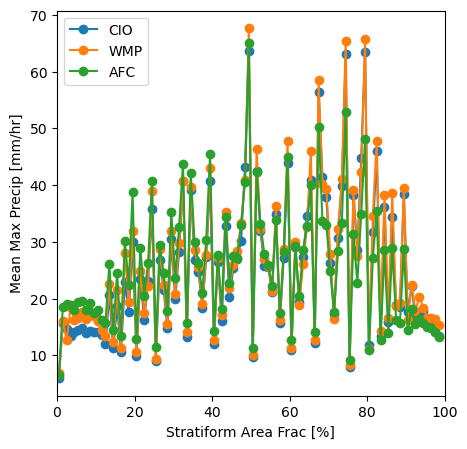

In [98]:
# Since there seems to be almost no influence by daily mean CRH, we can just look at a line plot
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_stats(region, trim_region=True)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = pf_stats.max_precip # change to crh or saf to check that axes are correct
    saf_bins = np.arange(0, 100, 1)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Max Precip [mm/hr]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

Text(0.5, 1.0, 'Mean Localization')

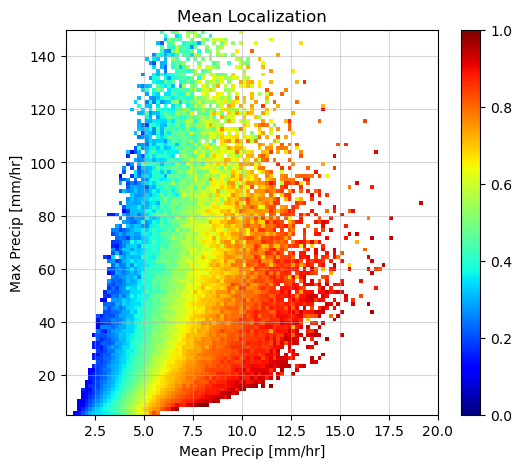

In [103]:
#
# Mean Precip and MaxPr
#

fig, ax = plt.subplots(figsize=(6,5))

meanpr = df['total_precip']/df['num_pixels']
maxpr = df['max_precip']
loc = df['max_5mmhr_cluster_precip']/df['total_precip']

meanpr_bins = np.linspace(1, 20, 100)
maxpr_bins = np.linspace(5, 150, 100)
stat = binned_statistic_2d(
    maxpr,
    meanpr,
    loc,
    bins=[maxpr_bins, meanpr_bins],
    statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan
).statistic

X, Y = np.meshgrid(
    meanpr_bins, 
    maxpr_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    stat,
    cmap=plt.cm.jet.copy(), 
    norm=colors.Normalize(vmin=0, vmax=1)
)
cb = fig.colorbar(c)

ax.set_xlabel('Mean Precip [mm/hr]')
ax.set_ylabel('Max Precip [mm/hr]')
ax.grid(alpha=0.5)
ax.set_title('Mean Localization')

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_42223/1894748004.py:18: RuntimeWarning: Mean of empty slice
  statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan


Text(0.5, 1.0, 'Mean Principal Cluster Precip [mm/hr]')

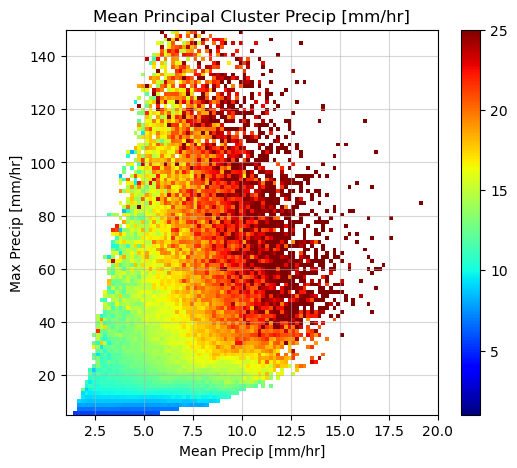

In [59]:
#
# Mean Precip and MaxPr
#

fig, ax = plt.subplots(figsize=(6,5))

meanpr = df['total_precip']/df['num_pixels']
maxpr = df['max_precip']
loc = df['max_5mmhr_cluster_precip']/df['max_5mmhr_size']

meanpr_bins = np.linspace(1, 20, 100)
maxpr_bins = np.linspace(5, 150, 100)
stat = binned_statistic_2d(
    maxpr,
    meanpr,
    loc,
    bins=[maxpr_bins, meanpr_bins],
    statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan
).statistic

X, Y = np.meshgrid(
    meanpr_bins, 
    maxpr_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    stat,
    cmap=plt.cm.jet.copy(), 
    norm=colors.Normalize(vmin=1, vmax=25)
)
cb = fig.colorbar(c)

ax.set_xlabel('Mean Precip [mm/hr]')
ax.set_ylabel('Max Precip [mm/hr]')
ax.grid(alpha=0.5)
ax.set_title('Mean Principal Cluster Precip [mm/hr]')

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_42223/2560470215.py:18: RuntimeWarning: Mean of empty slice
  statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan


Text(0.5, 1.0, 'Mean Non-Principal Cluster Precip [mm/hr]')

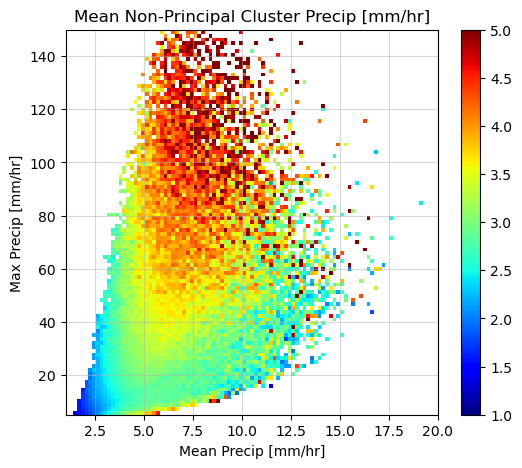

In [60]:
#
# Mean Precip and MaxPr
#

fig, ax = plt.subplots(figsize=(6,5))

meanpr = df['total_precip']/df['num_pixels']
maxpr = df['max_precip']
loc = (df['total_precip']-df['max_5mmhr_cluster_precip'])/(df['num_pixels']-df['max_5mmhr_size'])

meanpr_bins = np.linspace(1, 20, 100)
maxpr_bins = np.linspace(5, 150, 100)
stat = binned_statistic_2d(
    maxpr,
    meanpr,
    loc,
    bins=[maxpr_bins, meanpr_bins],
    statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan
).statistic

X, Y = np.meshgrid(
    meanpr_bins, 
    maxpr_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    stat,
    cmap=plt.cm.jet.copy(), 
    norm=colors.Normalize(vmin=1, vmax=5)
)
cb = fig.colorbar(c)

ax.set_xlabel('Mean Precip [mm/hr]')
ax.set_ylabel('Max Precip [mm/hr]')
ax.grid(alpha=0.5)
ax.set_title('Mean Non-Principal Cluster Precip [mm/hr]')

Text(0.5, 1.0, 'Mean Non-Principal Cluster Precip [mm/hr]')

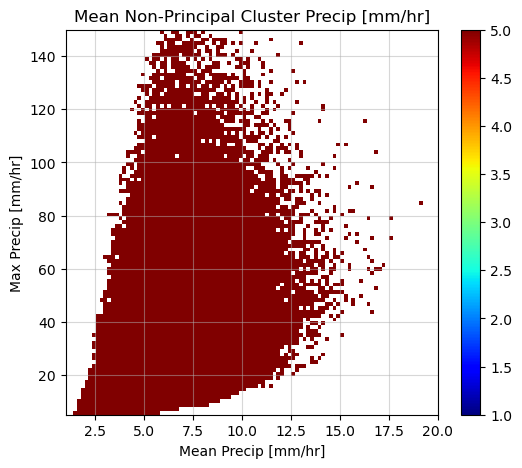

In [99]:
#
# Mean Precip and MaxPr
#

fig, ax = plt.subplots(figsize=(6,5))

meanpr = df['total_precip']/df['num_pixels']
maxpr = df['max_precip']
loc = (df['total_precip'])

meanpr_bins = np.linspace(1, 20, 100)
maxpr_bins = np.linspace(5, 150, 100)
stat = binned_statistic_2d(
    maxpr,
    meanpr,
    loc,
    bins=[maxpr_bins, meanpr_bins],
    statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan
).statistic

X, Y = np.meshgrid(
    meanpr_bins, 
    maxpr_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    stat,
    cmap=plt.cm.jet.copy(), 
    norm=colors.Normalize(vmin=1, vmax=5)
)
cb = fig.colorbar(c)

ax.set_xlabel('Mean Precip [mm/hr]')
ax.set_ylabel('Max Precip [mm/hr]')
ax.grid(alpha=0.5)
ax.set_title('Mean Non-Principal Cluster Precip [mm/hr]')

Text(0.5, 1.0, 'Mean PF Size [km2]')

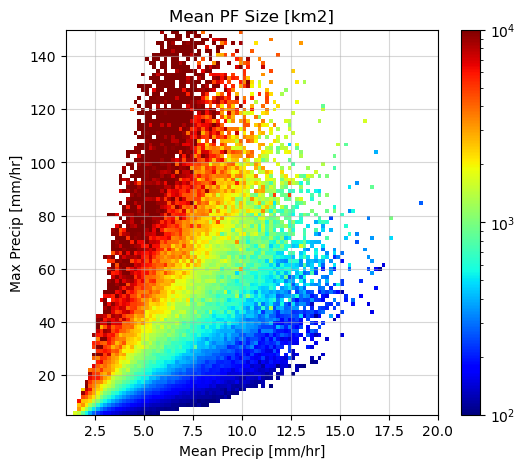

In [48]:
#
# Mean Precip and MaxPr
#

fig, ax = plt.subplots(figsize=(6,5))

meanpr = df['total_precip']/df['num_pixels']
maxpr = df['max_precip']
area = df['num_pixels'] * 25

meanpr_bins = np.linspace(1, 20, 100)
maxpr_bins = np.linspace(5, 150, 100)
stat = binned_statistic_2d(
    maxpr,
    meanpr,
    area,
    bins=[maxpr_bins, meanpr_bins],
    statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan
).statistic

X, Y = np.meshgrid(
    meanpr_bins, 
    maxpr_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    stat,
    cmap=plt.cm.jet.copy(), 
    norm=colors.LogNorm(vmin=10**(2), vmax=1e4)
)
cb = fig.colorbar(c)

ax.set_xlabel('Mean Precip [mm/hr]')
ax.set_ylabel('Max Precip [mm/hr]')
ax.grid(alpha=0.5)
ax.set_title('Mean PF Size [km2]')

Text(0.5, 1.0, 'Principal Core Area Frac')

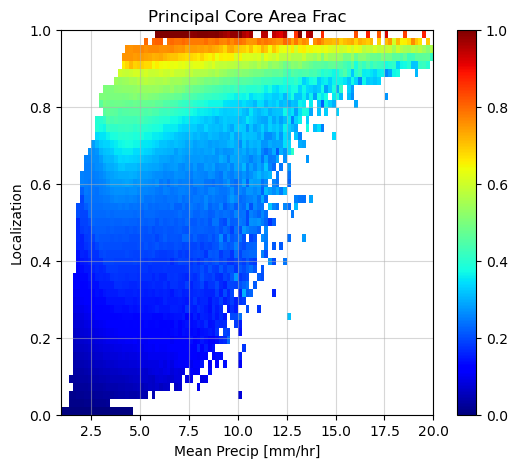

In [61]:
#
# Mean Precip and Localization
#

fig, ax = plt.subplots(figsize=(6,5))

area = df['num_pixels'] * 25
loc = df['max_5mmhr_cluster_precip']/df['total_precip']

maxpr = df['max_precip']
meanpr_bins = np.linspace(1, 20, 100)
loc_bins = np.linspace(0, 1, 50)
stat = binned_statistic_2d(
    loc,
    meanpr,
    area_frac,
    bins=[loc_bins, meanpr_bins],
    statistic=lambda x: np.nanmean(x) if x.size >= 5 else np.nan
).statistic

X, Y = np.meshgrid(
    meanpr_bins, 
    loc_bins
)
c = ax.pcolormesh(
    X, 
    Y, 
    stat,
    cmap=plt.cm.jet.copy(), 
    norm=colors.Normalize(vmin=0, vmax=1)
)
cb = fig.colorbar(c)

ax.set_xlabel('Mean Precip [mm/hr]')
ax.set_ylabel('Localization')
ax.grid(alpha=0.5)
ax.set_title('Principal Core Area Frac')